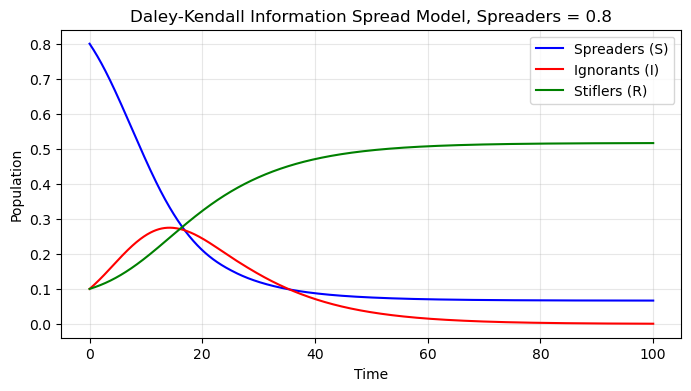

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Daley-Kendall model for information spread
def daley_kendall_info(t, y, alpha, beta, gamma):
    S, I, R = y
    dS_dt = -beta * S * I
    dI_dt = beta * S * I - alpha * I
    dR_dt = gamma * I
    return [dS_dt, dI_dt, dR_dt]

# Parameters
alpha = 0.1   # Rate at which ignorants become stiflers
beta = 0.3    # Rate at which spreaders influence ignorants
gamma = 0.05  # Rate at which ignorants become stiflers (bored)

# Initial conditions
S0 = 0.8  # Initial spreaders
I0 = 0.1  # Initial ignorants
R0 = 0.1  # Initial stiflers
initial_conditions = [S0, I0, R0]

# Time span
t_span = (0, 100)
t_eval = np.linspace(*t_span, 1000)

# Solve the system of ODEs
solution = solve_ivp(
    daley_kendall_info,
    t_span,
    initial_conditions,
    args=(alpha, beta, gamma),
    t_eval=t_eval,
)

# Plot spreaders, ignorants, and stiflers
plt.figure(figsize=(8, 4))
plt.plot(solution.t, solution.y[0], label='Spreaders (S)', color='b')
plt.plot(solution.t, solution.y[1], label='Ignorants (I)', color='r')
plt.plot(solution.t, solution.y[2], label='Stiflers (R)', color='g')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Daley-Kendall Information Spread Model, Spreaders = 0.8')
plt.grid(True, alpha = 0.3)
#plt.show()
plt.savefig("1.png")

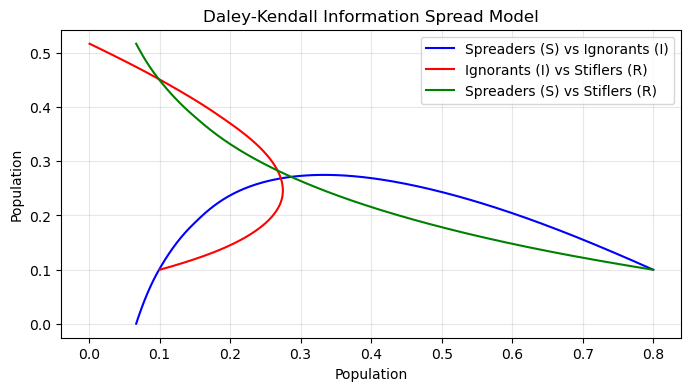

<Figure size 640x480 with 0 Axes>

In [2]:
# put any new or modified code here!
plt.figure(figsize=(8, 4))
plt.plot(solution.y[0], solution.y[1], label='Spreaders (S) vs Ignorants (I)', color='b')
plt.plot(solution.y[1], solution.y[2], label='Ignorants (I) vs Stiflers (R)', color='r')
plt.plot(solution.y[0], solution.y[2], label='Spreaders (S) vs Stiflers (R)', color='g')
plt.xlabel('Population')
plt.ylabel('Population')
plt.legend()
plt.title('Daley-Kendall Information Spread Model')
plt.grid(True, alpha = 0.3)
plt.show()
plt.savefig('.pdf')

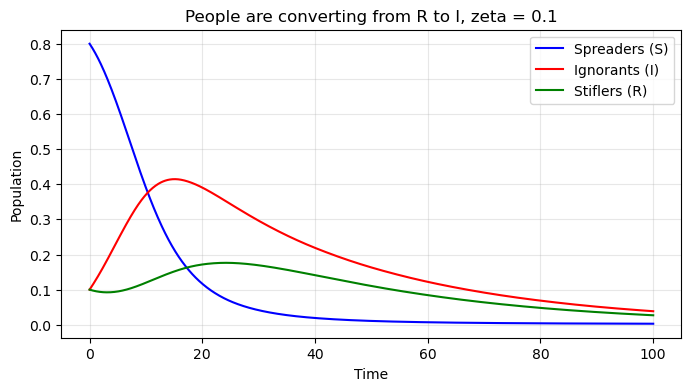

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Daley-Kendall model for information spread
def daley_kendall_info_1(t, y, alpha, beta, gamma, zeta):
    S, I, R = y
    dS_dt = -beta * S * I
    dI_dt = beta * S * I - alpha * I + zeta * R
    dR_dt = gamma * I - zeta * R
    return [dS_dt, dI_dt, dR_dt]

# Parameters
alpha = 0.1   # Rate at which ignorants become stiflers
beta = 0.3    # Rate at which spreaders influence ignorants
gamma = 0.05  # Rate at which ignorants become stiflers (bored)
zeta = 0.1 # Rate at which siflers are converted to ignorants 

# Initial conditions
S0 = 0.8  # Initial spreaders
I0 = 0.1  # Initial ignorants
R0 = 0.1  # Initial stiflers
initial_conditions = [S0, I0, R0]

# Time span
t_span = (0, 100)
t_eval = np.linspace(*t_span, 1000)

# Solve the system of ODEs
solution = solve_ivp(
    daley_kendall_info_1,
    t_span,
    initial_conditions,
    args=(alpha, beta, gamma, zeta),
    t_eval=t_eval,
)

# Plot spreaders, ignorants, and stiflers
plt.figure(figsize=(8, 4))
plt.plot(solution.t, solution.y[0], label='Spreaders (S)', color='b')
plt.plot(solution.t, solution.y[1], label='Ignorants (I)', color='r')
plt.plot(solution.t, solution.y[2], label='Stiflers (R)', color='g')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('People are converting from R to I, zeta = 0.1')
plt.grid(True, alpha = 0.3)
plt.show()
